In [1]:
import pandas as pd
import numpy as np

In [ ]:
import time


In [2]:
data = pd.read_csv('BankChurners.csv')

In [3]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
data.shape

(10127, 23)

This dataset is interesting to me as this is a highly imbalanced data with only 16% of the customers being churned. The data also has 5 categorical variables out of 18 total columns. The total number of customers are 10127.


In [5]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

The categorical columns in the data are 
   * Gender
   * Education_Level
   * Marital_Status
   * Income_Category 	
   * Card_Category
   

In [6]:
cols = np.arange(21,data.shape[1])
data.drop(data.columns[cols],axis=1,inplace=True)
data.describe()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [8]:
data_demographic=pd.concat([data['Customer_Age'],data['Gender'],data['Education_Level'],data['Marital_Status'],data['Income_Category'],data['Attrition_Flag']],axis=1)

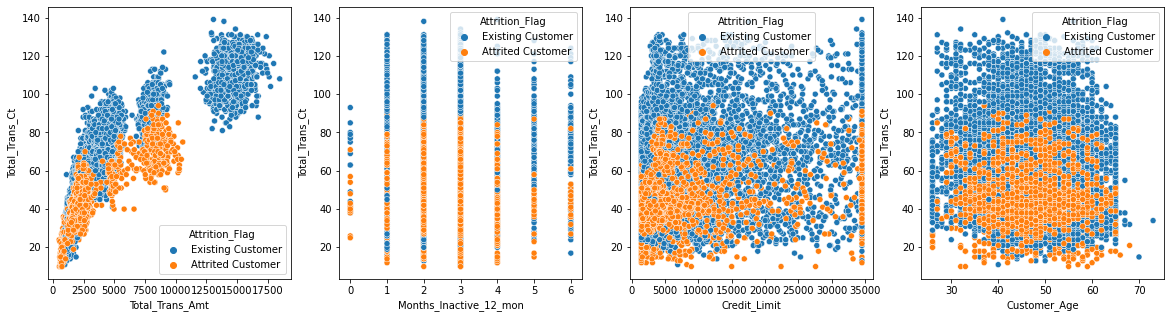

In [9]:
data_frequency=pd.concat([data['Customer_Age'],data['Total_Trans_Ct'],data['Total_Trans_Amt'],data['Months_Inactive_12_mon'],data['Credit_Limit'],data['Attrition_Flag']],axis=1)
fig,ax=plt.subplots(ncols=4,figsize=(20,5))
sns.scatterplot(data=data_frequency,y="Total_Trans_Ct",x="Total_Trans_Amt",hue="Attrition_Flag",ax=ax[0])
sns.scatterplot(data=data_frequency,y="Total_Trans_Ct",x="Months_Inactive_12_mon",hue="Attrition_Flag",ax=ax[1])
sns.scatterplot(data=data_frequency,y="Total_Trans_Ct",x="Credit_Limit",hue="Attrition_Flag",ax=ax[2])
_scat=sns.scatterplot(data=data_frequency,y="Total_Trans_Ct",x="Customer_Age",hue="Attrition_Flag",ax=ax[3])

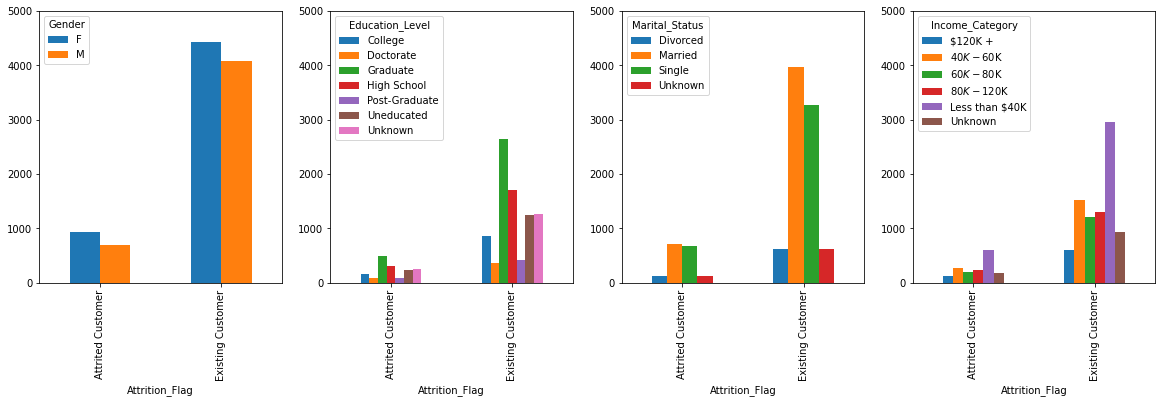

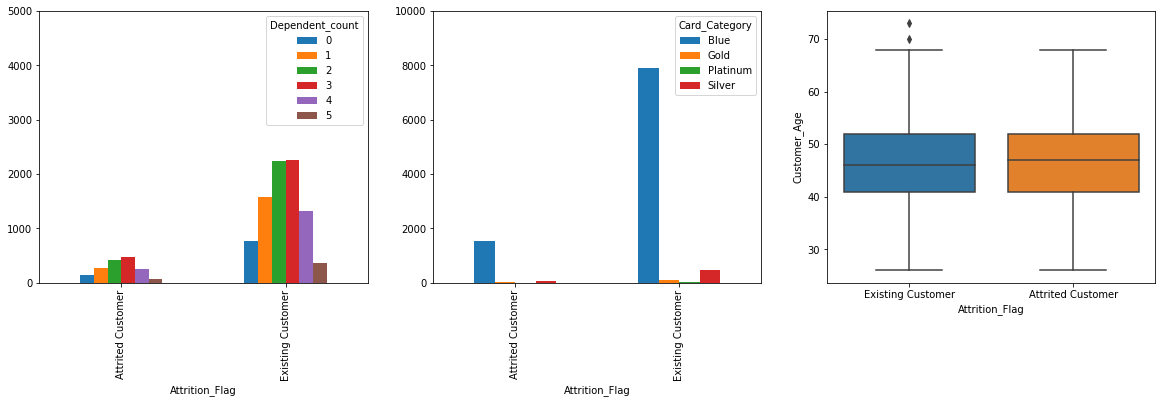

In [10]:
fig,(ax, ax2, ax3, ax4)=plt.subplots(ncols=4,figsize=(20,5))
pd.crosstab(data['Attrition_Flag'],data['Gender']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(data['Attrition_Flag'],data['Education_Level']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(data['Attrition_Flag'],data['Marital_Status']).plot(kind='bar',ax=ax3, ylim=[0,5000])
pd.crosstab(data['Attrition_Flag'],data['Income_Category']).plot(kind='bar',ax=ax4, ylim=[0,5000])

fig,(ax, ax2, ax3)=plt.subplots(ncols=3,figsize=(20,5))
pd.crosstab(data['Attrition_Flag'],data['Dependent_count']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(data['Attrition_Flag'],data['Card_Category']).plot(kind='bar',ax=ax2, ylim=[0,10000])
_box=sns.boxplot(data = data_demographic,x='Attrition_Flag',y='Customer_Age', ax=ax3)

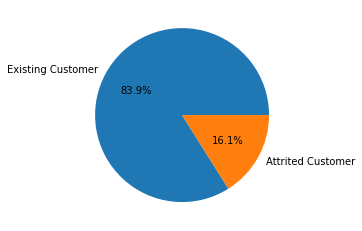

In [11]:
churn=data['Attrition_Flag'].value_counts()
churn
_piechart=plt.pie(x=churn,labels=churn.keys(),autopct="%.1f%%")

In [12]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [13]:
data['Education_Level']

0        High School
1           Graduate
2           Graduate
3        High School
4         Uneducated
            ...     
10122       Graduate
10123        Unknown
10124    High School
10125       Graduate
10126       Graduate
Name: Education_Level, Length: 10127, dtype: object

In [14]:
data_categorical=data.loc[:,data.dtypes==np.object]
data_categorical = data_categorical[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category','Card_Category','Attrition_Flag']]
data_categorical.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,M,High School,Married,$60K - $80K,Blue,Existing Customer
1,F,Graduate,Single,Less than $40K,Blue,Existing Customer
2,M,Graduate,Married,$80K - $120K,Blue,Existing Customer
3,F,High School,Unknown,Less than $40K,Blue,Existing Customer
4,M,Uneducated,Married,$60K - $80K,Blue,Existing Customer


In [15]:
data_numerical=data.loc[:,data.dtypes!=np.object]
data_numerical['Attrition_Flag']=data.loc[:,'Attrition_Flag']
oh=pd.get_dummies(data_numerical['Attrition_Flag'])
data_numerical=data_numerical.drop(['Attrition_Flag'],axis=1)
data_numerical=data_numerical.drop(['CLIENTNUM'],axis=1)
data_numerical=data_numerical.join(oh)
data_numerical.head()

/home/dheekshitha-vibha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrited Customer,Existing Customer
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,1
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1


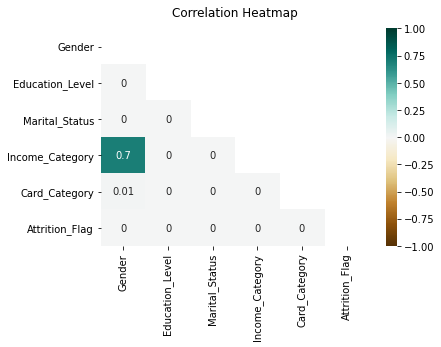

In [16]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_categorical_encoded = pd.DataFrame() 

for i in data_categorical.columns :
  data_categorical_encoded[i]=label.fit_transform(data_categorical[i])

from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

rows= []

for var1 in data_categorical_encoded:
  col = []
  for var2 in data_categorical_encoded :
    cramers =cramers_V(data_categorical_encoded[var1], data_categorical_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
cramerv_matrix = pd.DataFrame(cramers_results, columns = data_categorical_encoded.columns, index =data_categorical_encoded.columns)
mask = np.triu(np.ones_like(cramerv_matrix, dtype=np.bool))
cat_heatmap = sns.heatmap(cramerv_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

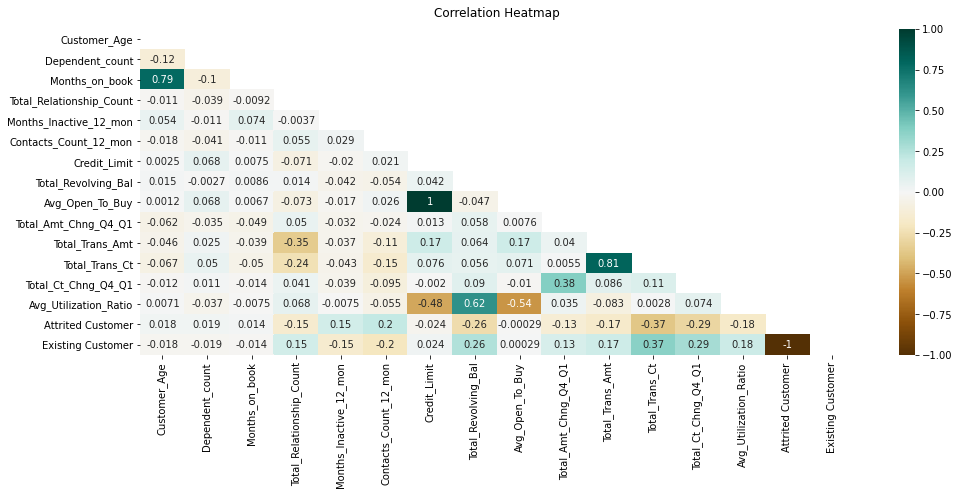

In [17]:
##Point Biserial Correlation
from scipy import stats
num_corr=data_numerical.corr()
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(num_corr, dtype=np.bool))
num_heatmap = sns.heatmap(num_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
num_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

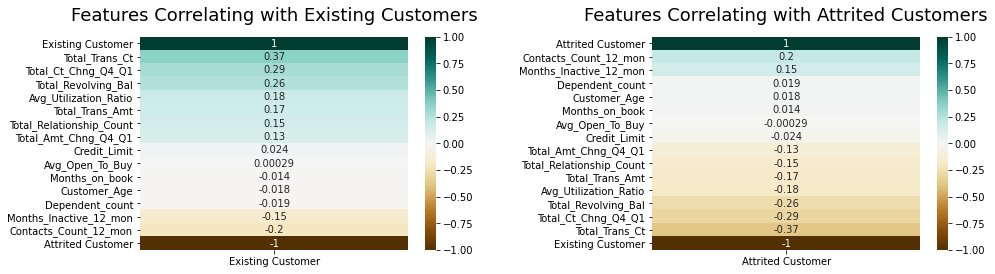

In [18]:
fig, ax=plt.subplots(ncols=2,figsize=(15, 5))

heatmap = sns.heatmap(num_corr[['Existing Customer']].sort_values(by='Existing Customer', ascending=False), ax=ax[0],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Existing Customers', fontdict={'fontsize':18}, pad=16);
heatmap = sns.heatmap(num_corr[['Attrited Customer']].sort_values(by='Attrited Customer', ascending=False), ax=ax[1],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Attrited Customers', fontdict={'fontsize':18}, pad=16);

fig.tight_layout(pad=5)



We see above that the following features are not correlated with customer churn (between -0.1 and +0.1) :

    Credit Limit
    Average Open To Buy
    Months On Book
    Age
    Dependent Count



In [19]:
data_model=data
data_model=data_model.drop(['CLIENTNUM','Credit_Limit','Customer_Age','Avg_Open_To_Buy','Months_on_book','Dependent_count'],axis=1)
data_model.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,M,High School,Married,$60K - $80K,Blue,5,1,3,777,1.335,1144,42,1.625,0.061
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue,6,1,2,864,1.541,1291,33,3.714,0.105
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue,4,1,0,0,2.594,1887,20,2.333,0.000
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue,3,4,1,2517,1.405,1171,20,2.333,0.760
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue,5,1,0,0,2.175,816,28,2.500,0.000


## One hot encoding

In [20]:
data_model['Attrition_Flag'] = data_model['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
data_oh=pd.get_dummies(data_model)
data_oh['Attrition_Flag'] = data_oh['Attrition_Flag'].map({1: 'Existing Customer', 0: 'Attrited Customer'})
list(data_oh.columns)

['Attrition_Flag',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Gender_F',
 'Gender_M',
 'Education_Level_College',
 'Education_Level_Doctorate',
 'Education_Level_Graduate',
 'Education_Level_High School',
 'Education_Level_Post-Graduate',
 'Education_Level_Uneducated',
 'Education_Level_Unknown',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Unknown',
 'Income_Category_$120K +',
 'Income_Category_$40K - $60K',
 'Income_Category_$60K - $80K',
 'Income_Category_$80K - $120K',
 'Income_Category_Less than $40K',
 'Income_Category_Unknown',
 'Card_Category_Blue',
 'Card_Category_Gold',
 'Card_Category_Platinum',
 'Card_Category_Silver']

In [21]:
data_oh['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [23]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [25]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = data_oh.loc[:, data_oh.columns != 'Attrition_Flag']
y = data_oh['Attrition_Flag']
x, x_test, y, y_test = train_test_split(X, y,test_size=0.2,train_size=0.8)
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size = 0.25,train_size =0.75)


sm = SMOTE(sampling_strategy=0.5, k_neighbors=20, random_state=42)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train)



In [26]:
# # y.head()
# X_train_res.to_csv("X_train_res_smote3.csv")
# y_train_res.to_csv("y_train_res_smote3.csv")
# y_test.to_csv("y_test_smote3.csv")
# x_test.to_csv("x_test_smote3.csv")
# y_valid.to_csv("y_valid_smote3.csv")
# x_valid.to_csv("x_valid_smote3.csv")

In [27]:
print(X_train_res.shape)
print(x_test.shape)
print(x_valid.shape)


(7675, 32)
(2026, 32)
(2026, 32)


In [28]:
#  Scaling features
scaler = StandardScaler()
scaler.fit(X_train_res)

scaled_x_train = scaler.transform(X_train_res)
scaler.fit(x_test)
scaled_x_test = scaler.transform(x_test)


In [29]:
scaler.fit(x_valid)
scaled_x_valid=scaler.transform(x_valid)
# scaled_y_cv =scaler.transform(y_cv)

In [30]:
import copy
y_test_copy=copy.deepcopy(y_test)

In [31]:
y_valid=y_valid.map({'Existing Customer': 1, 'Attrited Customer': 0})

y_train_res=y_train_res.map({'Existing Customer': 1, 'Attrited Customer': 0})

In [32]:
y_test=y_test.map({'Existing Customer': 1, 'Attrited Customer': 0})

In [33]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [35]:
def plotconfusionMatrix(modelObj,ytest,xtest):
#     model_DecTreeClass2.fit(X_train_res, y_train_res)
    y_pred_DecTreeClass2 = modelObj.predict(xtest)
    conf_mat2 = metrics.confusion_matrix(ytest, y_pred_DecTreeClass2)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_mat2,annot=True)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual class")
    plt.show()
    print('Confusion matrix: \n', conf_mat2)
    print('TP: ', conf_mat2[1,1])
    print('TN: ', conf_mat2[0,0])
    print('FP: ', conf_mat2[0,1])
    print('FN: ', conf_mat2[1,0])

In [136]:
def getMetrics(modelObj,xTrain,yTrain,xValid,yValid):
    y_pred_DecTreeClass2 = modelObj.predict(xValid)
    print('Classification report: \n', metrics.classification_report(yValid, y_pred_DecTreeClass2))
    print('Training Accuracy_Score:',metrics.accuracy_score(yTrain, modelObj.predict(xTrain))*100,'%')
    print('Training Precision:',metrics.precision_score(yTrain, modelObj.predict(xTrain))*100,'%')
    print('Training Recall:',metrics.recall_score(yTrain, modelObj.predict(xTrain))*100,'%')
    
    print('Training F1 Score:',metrics.f1_score(yTrain, modelObj.predict(xTrain))*100,'%')

    
    print('Validation Accuracy_Score:',metrics.accuracy_score(yValid, y_pred_DecTreeClass2)*100,'%')
    print('Validation Precision:',metrics.precision_score(yValid, y_pred_DecTreeClass2)*100,'%')
    print('Validation Recall:',metrics.recall_score(yValid, y_pred_DecTreeClass2)*100,'%')
    
    print('Validation F1 Score:',metrics.f1_score(yValid, y_pred_DecTreeClass2)*100,'%')

In [37]:
model_DecTreeClass2 = DecisionTreeClassifier(random_state=0,criterion='gini')
model_DecTreeClass2.fit(scaled_x_train,y_train_res)


DecisionTreeClassifier(random_state=0)

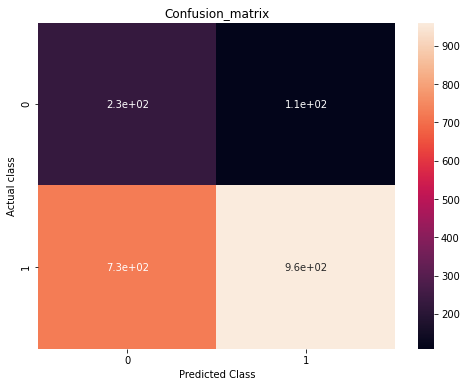

Confusion matrix: 
 [[230 109]
 [727 960]]
TP:  960
TN:  230
FP:  109
FN:  727


In [161]:
plotconfusionMatrix(model_DecTreeClass2,y_valid,x_valid)

In [40]:
getMetrics(model_DecTreeClass2,scaled_x_train,y_train_res,scaled_x_valid,y_valid)

Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       339
           1       0.97      0.96      0.96      1687

    accuracy                           0.94      2026
   macro avg       0.88      0.90      0.89      2026
weighted avg       0.94      0.94      0.94      2026

Training Accuracy_Score: 100.0 %
Training Recall: 100.0 %
Training Precision: 100.0 %
Training F1 Score: 100.0 %
Validation Accuracy_Score: 93.78084896347482 %
Validation Recall: 95.7320687611144 %
Validation Precision: 96.76452965847812 %
Validation F1 Score: 96.24553039332537 %


In [42]:
# !pip install pydotplusdot_data
path = model_DecTreeClass2.cost_complexity_pruning_path(scaled_x_train, y_train_res)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

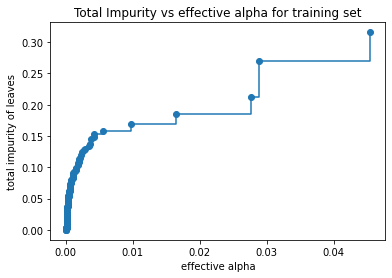

In [44]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [47]:
clfs = []
for ccp_alpha in ccp_alphas:
    model_DecTreeClass2 = DecisionTreeClassifier(random_state=0,criterion='gini')
    model_DecTreeClass2.fit(scaled_x_train, y_train_res)

    clfs.append(model_DecTreeClass2)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 699 with ccp_alpha: 0.1285424379330437


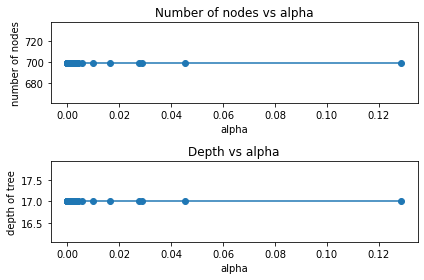

In [48]:
# clfs = clfs[:-1]
# ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

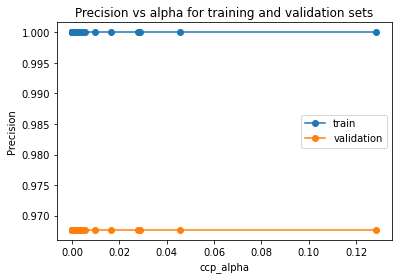

In [58]:
train_precision = [metrics.precision_score(y_train_res,clf.predict(scaled_x_train))for clf in clfs]
test_precision =[metrics.precision_score(y_valid,clf.predict(scaled_x_valid))for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_precision, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_precision, marker='o', label="validation",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [50]:
from sklearn import tree

[Text(204.50749187638274, 211.4, 'X[6] <= -0.261\ngini = 0.444\nsamples = 7675\nvalue = [2558, 5117]'),
 Text(111.96987175055311, 199.32, 'X[3] <= -0.48\ngini = 0.472\nsamples = 3387\nvalue = [2095, 1292]'),
 Text(60.167090707964604, 187.24, 'X[7] <= 0.632\ngini = 0.223\nsamples = 1504\nvalue = [1312, 192]'),
 Text(42.312942477876106, 175.16, 'X[10] <= 0.192\ngini = 0.17\nsamples = 1393\nvalue = [1262, 131]'),
 Text(28.208628318584072, 163.07999999999998, 'X[4] <= 1.864\ngini = 0.093\nsamples = 1038\nvalue = [987, 51]'),
 Text(27.221017699115045, 151.0, 'X[0] <= 1.221\ngini = 0.087\nsamples = 1034\nvalue = [987, 47]'),
 Text(17.406637168141593, 138.92000000000002, 'X[16] <= 1.172\ngini = 0.065\nsamples = 983\nvalue = [950, 33]'),
 Text(7.160176991150443, 126.84, 'X[2] <= -1.874\ngini = 0.046\nsamples = 931\nvalue = [909, 22]'),
 Text(1.9752212389380532, 114.75999999999999, 'X[4] <= -1.192\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.9876106194690266, 102.67999999999999, 'gini =

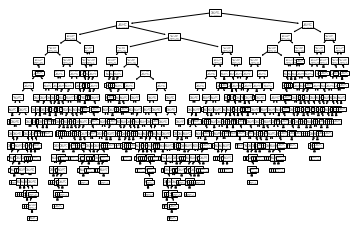

In [51]:
tree.plot_tree(model_DecTreeClass2)

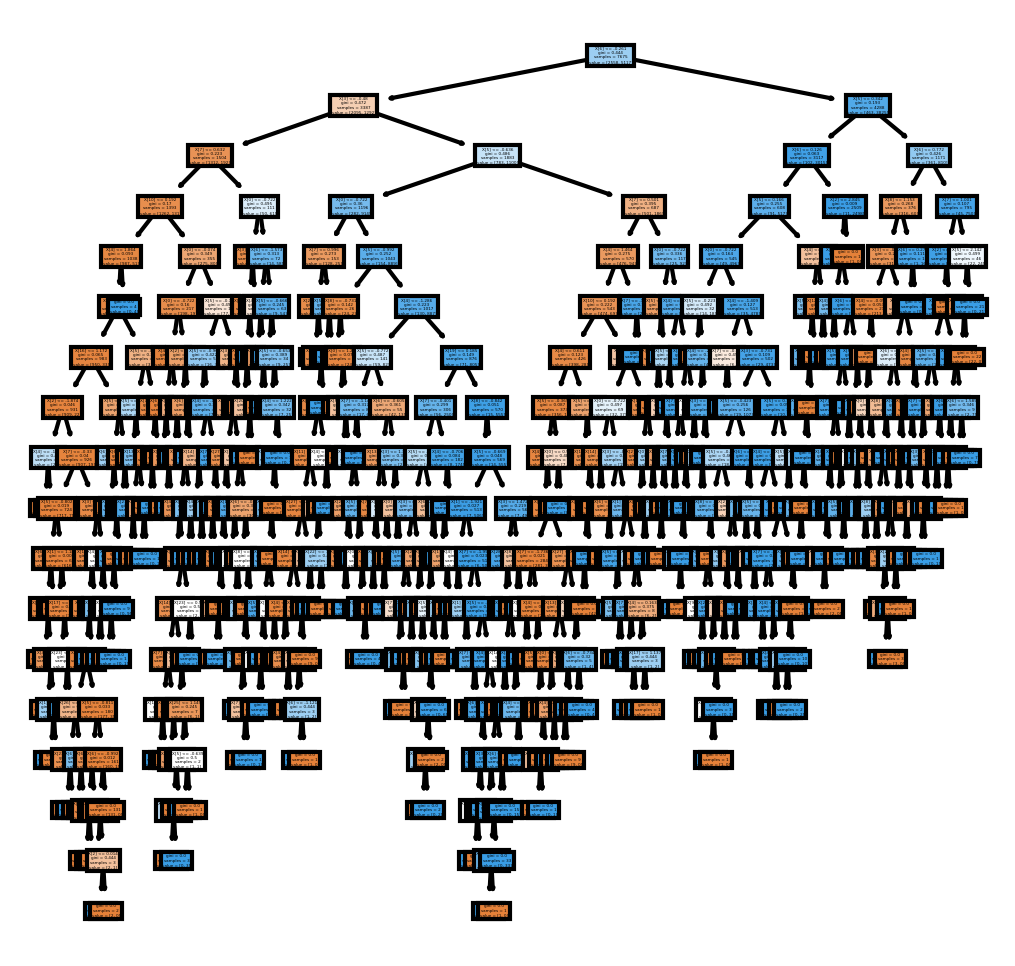

In [52]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_DecTreeClass2,
#                feature_names = fn, 
#                class_names=cn,
               filled = True);fig.savefig('DT_tree.png')

In [53]:
model_DecTreeClass2.get_n_leaves()

350

In [54]:
model_DecTreeClass2.get_depth()


17

In [55]:
model_DecTreeClass2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
# print(dskgj)

In [59]:
parameter_decisiontree = {'max_depth':[4,5,6,7,8,9,10,13,16,18,21,24],
#                           'min_impurity_decrease':[0.1,0.2,0.3,0.25,0.35],
                         'ccp_alpha':np.arange(0, 0.4, 0.1).tolist(),'criterion':['gini','entropy']
#                          'min_samples_split':[0.1,0.08,0.06,.15]
                         }

In [60]:
model_DecTreeClass = DecisionTreeClassifier(random_state=0)
DTmodel  =GridSearchCV(model_DecTreeClass,parameter_decisiontree)

# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_DecTreeClass)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# print('AUC: %.2f' % (roc_auc*100), "%")

In [61]:
DTmodel.fit(scaled_x_train, y_train_res)
y_pred_DecTreeClass = DTmodel.predict(scaled_x_valid)


In [62]:
DTmodel.best_params_

{'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 13}

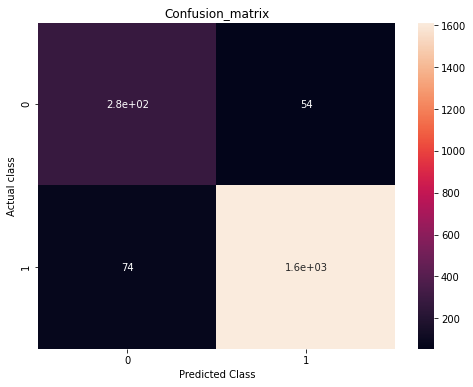

Confusion matrix: 
 [[ 285   54]
 [  74 1613]]
TP:  1613
TN:  285
FP:  54
FN:  74
Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       339
           1       0.97      0.96      0.96      1687

    accuracy                           0.94      2026
   macro avg       0.88      0.90      0.89      2026
weighted avg       0.94      0.94      0.94      2026

Training Accuracy_Score: 99.76547231270358 %
Training Recall: 99.72640218878249 %
Training Precision: 99.92167613080086 %
Training F1 Score: 99.82394366197182 %
Validation Accuracy_Score: 93.68213228035538 %
Validation Recall: 95.6135151155898 %
Validation Precision: 96.76064787042591 %
Validation F1 Score: 96.18366129994037 %


In [84]:
plotconfusionMatrix(DTmodel,y_valid,scaled_x_valid)

getMetrics(DTmodel,scaled_x_train,y_train_res,scaled_x_valid,y_valid)


In [135]:
getMetrics(DTmodel,scaled_x_train,y_train_res,scaled_x_test
           ,y_test)

Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.79      0.78       330
           1       0.96      0.96      0.96      1696

    accuracy                           0.93      2026
   macro avg       0.87      0.87      0.87      2026
weighted avg       0.93      0.93      0.93      2026

Training Accuracy_Score: 99.76547231270358 %
Training Recall: 99.72640218878249 %
Training Precision: 99.92167613080086 %
Training F1 Score: 99.82394366197182 %
Validation Accuracy_Score: 92.94175715695953 %
Validation Recall: 95.69575471698113 %
Validation Precision: 95.8653278204371 %
Validation F1 Score: 95.78046621422247 %


In [64]:
from sklearn.model_selection import learning_curve

In [67]:
sizes, training_scores, testing_scores = learning_curve(DecisionTreeClassifier(random_state=0,ccp_alpha=0,
                                                                               criterion='entropy',max_depth= 13),scaled_x_train, y_train_res,
                                                       scoring="Precision")

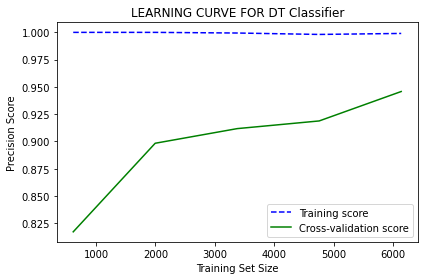

In [68]:
# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR DT Classifier") 
plt.xlabel("Training Set Size"), plt.ylabel("Precision Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

In [73]:
parameter_decisiontree = [4,7,8,9,10,13,16,18,21,24,27,30]
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    DecisionTreeClassifier(random_state=0,criterion='entropy', ccp_alpha= 0), scaled_x_train, y_train_res,
    param_range=parameter_decisiontree,  scoring="precision",param_name="max_depth",cv=5
)


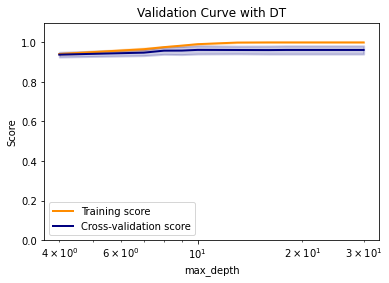

In [74]:
train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=[4,7,8,9,10,13,16,18,21,24,27,30]
plt.title("Validation Curve with DT")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## SVM

In [75]:
from sklearn.svm import SVC

In [76]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear','poly']}  

In [77]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(scaled_x_train, y_train_res) 

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.9s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.9s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.9s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.0s
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.4s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.4s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.6s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.6s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.6s
[CV 1/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV 2/5] END ....................C=0.1, gamma=1

[CV 2/5] END ....................C=1, gamma=0.1, kernel=poly; total time=   0.8s
[CV 3/5] END ....................C=1, gamma=0.1, kernel=poly; total time=   1.3s
[CV 4/5] END ....................C=1, gamma=0.1, kernel=poly; total time=   1.2s
[CV 5/5] END ....................C=1, gamma=0.1, kernel=poly; total time=   1.4s
[CV 1/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.6s
[CV 2/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.6s
[CV 3/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.9s
[CV 4/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.9s
[CV 5/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.9s
[CV 1/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.6s
[CV 2/5] END .................C=1, gamma=0.01, kernel=linear; total time=   0.7s
[CV 3/5] END .................C=1, gamma=0.01, kernel=linear; total time=   1.0s
[CV 4/5] END ...............

[CV 4/5] END ...............C=10, gamma=0.001, kernel=linear; total time=   3.8s
[CV 5/5] END ...............C=10, gamma=0.001, kernel=linear; total time=   3.6s
[CV 1/5] END .................C=10, gamma=0.001, kernel=poly; total time=   1.6s
[CV 2/5] END .................C=10, gamma=0.001, kernel=poly; total time=   1.6s
[CV 3/5] END .................C=10, gamma=0.001, kernel=poly; total time=   1.6s
[CV 4/5] END .................C=10, gamma=0.001, kernel=poly; total time=   1.6s
[CV 5/5] END .................C=10, gamma=0.001, kernel=poly; total time=   1.6s
[CV 1/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.9s
[CV 2/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   1.0s
[CV 3/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   1.2s
[CV 4/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   1.2s
[CV 5/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   1.2s
[CV 1/5] END ..............C

[CV 1/5] END .................C=1000, gamma=1, kernel=linear; total time= 1.5min
[CV 2/5] END .................C=1000, gamma=1, kernel=linear; total time= 2.2min
[CV 3/5] END .................C=1000, gamma=1, kernel=linear; total time= 3.3min
[CV 4/5] END .................C=1000, gamma=1, kernel=linear; total time= 4.0min
[CV 5/5] END .................C=1000, gamma=1, kernel=linear; total time= 3.5min
[CV 1/5] END ...................C=1000, gamma=1, kernel=poly; total time=   0.7s
[CV 2/5] END ...................C=1000, gamma=1, kernel=poly; total time=   1.0s
[CV 3/5] END ...................C=1000, gamma=1, kernel=poly; total time=   2.9s
[CV 4/5] END ...................C=1000, gamma=1, kernel=poly; total time=   2.9s
[CV 5/5] END ...................C=1000, gamma=1, kernel=poly; total time=   2.5s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   1.1s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   1.1s
[CV 3/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [79]:
# import joblib

In [80]:
# joblib.dump(grid, 'SVM_gridsearch_smote3.pkl')

['SVM_gridsearch_smote3.pkl']

In [81]:
# svmModel = joblib.load('SVM_gridsearch_smote3.pkl')
svmModel=grid

In [82]:
svmModel.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
y_pred_SVM = svmModel.predict(x_test)

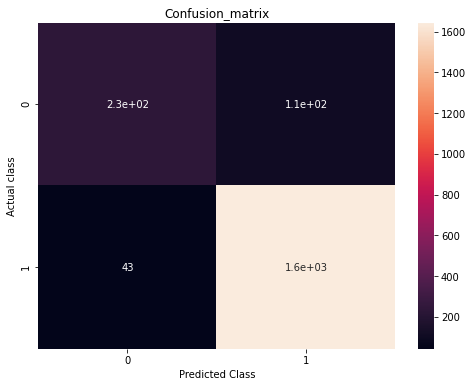

Confusion matrix: 
 [[ 233  106]
 [  43 1644]]
TP:  1644
TN:  233
FP:  106
FN:  43
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.69      0.76       339
           1       0.94      0.97      0.96      1687

    accuracy                           0.93      2026
   macro avg       0.89      0.83      0.86      2026
weighted avg       0.92      0.93      0.92      2026

Training Accuracy_Score: 95.17915309446255 %
Training Recall: 98.22161422708618 %
Training Precision: 94.74081055607917 %
Training F1 Score: 96.44981769334102 %
Validation Accuracy_Score: 92.64560710760118 %
Validation Recall: 97.4510966212211 %
Validation Precision: 93.94285714285714 %
Validation F1 Score: 95.66482397439627 %


In [85]:
plotconfusionMatrix(svmModel,y_valid,scaled_x_valid)

getMetrics(svmModel,scaled_x_train,y_train_res,scaled_x_valid,y_valid)

In [101]:
getMetrics(svmModel,scaled_x_train,y_train_res,scaled_x_test,y_test)

Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.69      0.75       330
           1       0.94      0.97      0.96      1696

    accuracy                           0.92      2026
   macro avg       0.88      0.83      0.85      2026
weighted avg       0.92      0.92      0.92      2026

Training Accuracy_Score: 95.17915309446255 %
Training Recall: 98.22161422708618 %
Training Precision: 94.74081055607917 %
Training F1 Score: 96.44981769334102 %
Validation Accuracy_Score: 92.49753208292202 %
Validation Recall: 97.11084905660378 %
Validation Precision: 94.11428571428571 %
Validation F1 Score: 95.58908879860708 %


In [86]:
svc = SVC(C= 1000, gamma= 0.01, kernel= 'rbf')
model_svc = svc.fit(scaled_x_train, y_train_res) 
y_svc_predict = model_svc.predict(x_test)
svc_df = pd.DataFrame(data = {"Actual":y_test, "Predicted": y_svc_predict})
# {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

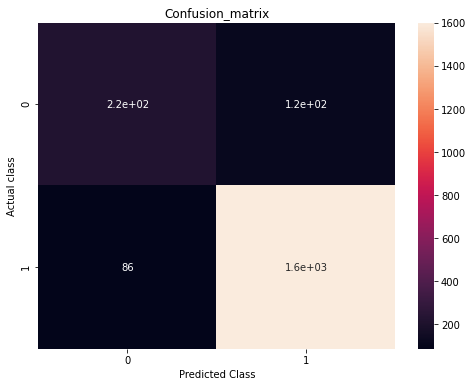

Confusion matrix: 
 [[ 221  118]
 [  86 1601]]
TP:  1601
TN:  221
FP:  118
FN:  86
Classification report: 
               precision    recall  f1-score   support

           0       0.72      0.65      0.68       339
           1       0.93      0.95      0.94      1687

    accuracy                           0.90      2026
   macro avg       0.83      0.80      0.81      2026
weighted avg       0.90      0.90      0.90      2026

Training Accuracy_Score: 99.2442996742671 %
Training Precision: 99.31760577110548 %
Training Recall: 99.55051788157124 %
Training F1 Score: 99.43392543431582 %
Validation Accuracy_Score: 89.93089832181639 %
Validation Precision: 93.13554392088423 %
Validation Recall: 94.9021932424422 %
Validation F1 Score: 94.01056958308865 %


In [138]:
plotconfusionMatrix(svc,y_valid,scaled_x_valid)

getMetrics(svc,scaled_x_train,y_train_res,scaled_x_valid,y_valid)

In [137]:
getMetrics(svc,scaled_x_train,y_train_res,scaled_x_test
           ,y_test)

Classification report: 
               precision    recall  f1-score   support

           0       0.71      0.70      0.70       330
           1       0.94      0.94      0.94      1696

    accuracy                           0.90      2026
   macro avg       0.82      0.82      0.82      2026
weighted avg       0.90      0.90      0.90      2026

Training Accuracy_Score: 99.2442996742671 %
Training Precision: 99.31760577110548 %
Training Recall: 99.55051788157124 %
Training F1 Score: 99.43392543431582 %
Validation Accuracy_Score: 90.32576505429417 %
Validation Precision: 94.11764705882352 %
Validation Recall: 94.33962264150944 %
Validation F1 Score: 94.22850412249706 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/svm/_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/svm/_base.py", line 560, in _validate_targets
    " class" % len(cls))
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)


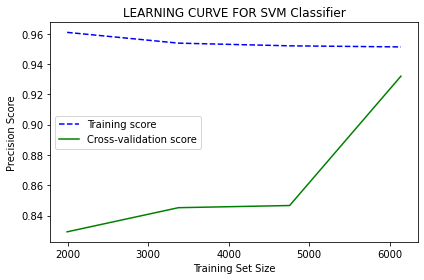

In [91]:
sizes, training_scores, testing_scores = learning_curve(SVC(C= 1000, gamma= 0.001, kernel= 'rbf'),scaled_x_train, y_train_res,
                                                       scoring="precision")

# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR SVM Classifier") 
plt.xlabel("Training Set Size"), plt.ylabel("Precision Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

In [108]:
t0=time.time()
svc2 = SVC(C= 1000, gamma= 0.001, kernel= 'rbf')

model_svc = svc2.fit(scaled_x_train, y_train_res) 
print("training time.time:", round(time.time()-t0, 3)) # the time.time would be round to 3 decimal in seconds
t1=time.time()
y_svc_predict = model_svc.predict(x_test)
print( "predict time.time:", round(time.time()-t1, 3), "s")


training time.time: 1.668
predict time.time: 0.188 s


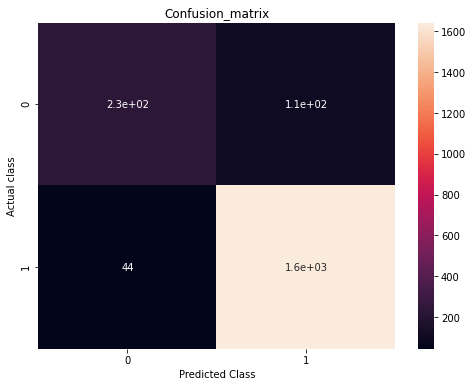

Confusion matrix: 
 [[ 233  106]
 [  44 1643]]
TP:  1643
TN:  233
FP:  106
FN:  44
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.69      0.76       339
           1       0.94      0.97      0.96      1687

    accuracy                           0.93      2026
   macro avg       0.89      0.83      0.86      2026
weighted avg       0.92      0.93      0.92      2026

Training Accuracy_Score: 95.59609120521174 %
Training Recall: 98.33887043189368 %
Training Precision: 95.21286660359507 %
Training F1 Score: 96.75062487983081 %
Validation Accuracy_Score: 92.59624876604146 %
Validation Recall: 97.3918197984588 %
Validation Precision: 93.93939393939394 %
Validation F1 Score: 95.63445867287544 %


In [96]:
svc2 = SVC(C= 2000, gamma= 0.001, kernel= 'rbf')
model_svc = svc2.fit(scaled_x_train, y_train_res) 
y_svc_predict = model_svc.predict(x_test)
svc_df = pd.DataFrame(data = {"Actual":y_test, "Predicted": y_svc_predict})
# {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

plotconfusionMatrix(svc2,y_valid,scaled_x_valid)

getMetrics(svc2,scaled_x_train,y_train_res,scaled_x_valid,y_valid)

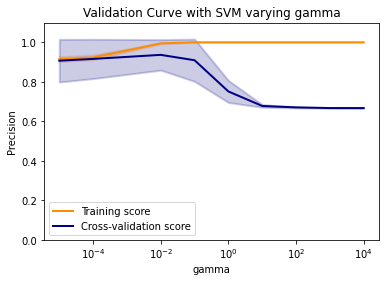

In [102]:
# parameter_svm = np.arange(0.0001,0.1,0.01)
parameter_svm =[0.00001,0.0001,0.01,0.1, 1, 10, 100, 1000,10000]
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    SVC(C=1000,kernel='rbf'), scaled_x_train, y_train_res,
    param_range=parameter_svm,  scoring="precision",param_name="gamma",cv=5
)


train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_svm
plt.title("Validation Curve with SVM varying gamma")
plt.xlabel("gamma")
plt.ylabel("Precision")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

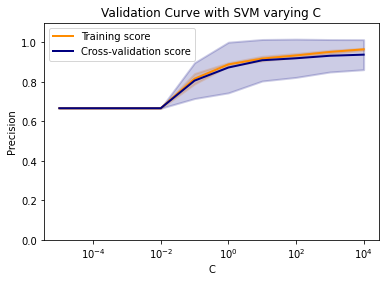

In [100]:
# parameter_svm = np.arange(0.0001,0.1,0.01)
parameter_svm =[0.00001,0.0001,0.01,0.1, 1, 10, 100, 1000,10000]
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    SVC(gamma=0.001,kernel='rbf'), scaled_x_train, y_train_res,
    param_range=parameter_svm,  scoring="precision",param_name="C",cv=5
)


train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_svm
plt.title("Validation Curve with SVM varying C")
plt.xlabel("C")
plt.ylabel("Precision")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

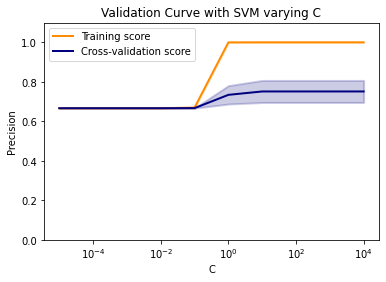

In [99]:
# parameter_svm = np.arange(0.0001,0.1,0.01)
parameter_svm =[0.00001,0.0001,0.01,0.1, 1, 10, 100, 1000,10000]
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    SVC(gamma=1,kernel='rbf'), scaled_x_train, y_train_res,
    param_range=parameter_svm,  scoring="precision",param_name="C",cv=5
)


train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_svm
plt.title("Validation Curve with SVM varying C")
plt.xlabel("C")
plt.ylabel("Precision")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## K-NN

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
gridKNN= {
    'n_neighbors':list(range(1,10,2)),
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

In [111]:
knn = GridSearchCV(
KNeighborsClassifier(),
gridKNN,
verbose=1,
cv=5)

In [112]:
# knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(scaled_x_train, y_train_res) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [114]:


# joblib.dump(knn, 'KNN_gridsearch_smote3.pkl')

['KNN_gridsearch_smote3.pkl']

In [115]:
# knnModel = joblib.load('KNN_gridsearch_smote3.pkl')
knnModel =knn

In [116]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [117]:
knnModel.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

In [119]:
parameter_knn= [4,7,8,9,10,11,12,13,14,15,16,17,18,19]
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    KNeighborsClassifier(metric= 'manhattan',weights= 'distance'), scaled_x_train, y_train_res,
    param_range=parameter_knn,  scoring="precision",param_name="n_neighbors",cv=5
)




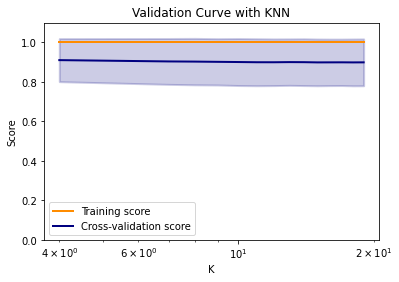

In [120]:
train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range= [4,7,8,9,10,11,12,13,14,15,16,17,18,19]
plt.title("Validation Curve with KNN")
plt.xlabel("K")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
# lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

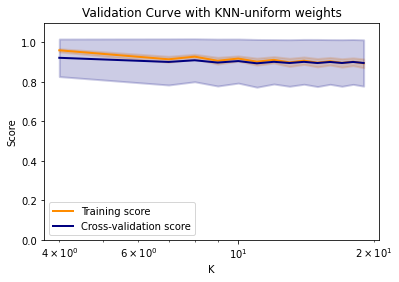

In [124]:
parameter_knn= [4,7,8,9,10,11,12,13,14,15,16,17,18,19]
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    KNeighborsClassifier(metric= 'manhattan',weights= 'uniform'), scaled_x_train, y_train_res,
    param_range=parameter_knn,  scoring="precision",param_name="n_neighbors",cv=5
)



train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range= [4,7,8,9,10,11,12,13,14,15,16,17,18,19]
plt.title("Validation Curve with KNN-uniform weights")
plt.xlabel("K")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
# lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [127]:
t0=time.time()
# svc2 =  
knn = KNeighborsClassifier(
n_neighbors=5,
    metric='euclidean', weights= 'distance')


model_svc = knn.fit(scaled_x_train, y_train_res) 
print("training time.time:", round(time.time()-t0, 3)) # the time.time would be round to 3 decimal in seconds
t1=time.time()
y_svc_predict = knn.predict(x_test)
print( "predict time.time:", round(time.time()-t1, 3), "s")


knn_predictions1 = knnModel.predict(scaled_x_test)
# knn_predictions1 = np.round(knn_predictions1)
print('knnoost Test Set')
print('Accuracy: %.2f' % ((knn_predictions1 == y_test).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train_res, knnModel.predict(scaled_x_train))*100,'%')
print('Training Recall:',metrics.recall_score(y_train_res, knnModel.predict(scaled_x_train))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train_res, knnModel.predict(scaled_x_train))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train_res, knnModel.predict(scaled_x_train))*100,'%')


# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_test, knn_predictions1)*100,'%')


print('precision_score:',metrics.precision_score(y_test, knn_predictions1)*100,'%')

print('recall_score:',metrics.recall_score(y_test, knn_predictions1)*100,'%')



training time.time: 0.004
predict time.time: 0.364 s
knnoost Test Set
Accuracy: 87.86
Training Accuracy_Score: 100.0 %
Training Recall: 100.0 %
Training precision_score: 100.0 %
Training F1 Score: 100.0 %
Accuracy_Score: 87.857847976308 %
precision_score: 88.40042372881356 %
recall_score: 98.40801886792453 %


In [121]:
t0=time.time()
# svc2 =  
knn = KNeighborsClassifier(
n_neighbors=9,
    metric='manhattan', weights= 'distance')


model_svc = knn.fit(scaled_x_train, y_train_res) 
print("training time.time:", round(time.time()-t0, 3)) # the time.time would be round to 3 decimal in seconds
t1=time.time()
y_svc_predict = knn.predict(x_test)
print( "predict time.time:", round(time.time()-t1, 3), "s")


training time.time: 0.003
predict time.time: 0.686 s


In [123]:
knn_predictions1 = knnModel.predict(scaled_x_test)
# knn_predictions1 = np.round(knn_predictions1)
print('knnoost Test Set')
print('Accuracy: %.2f' % ((knn_predictions1 == y_test).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train_res, knnModel.predict(scaled_x_train))*100,'%')
print('Training Recall:',metrics.recall_score(y_train_res, knnModel.predict(scaled_x_train))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train_res, knnModel.predict(scaled_x_train))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train_res, knnModel.predict(scaled_x_train))*100,'%')


# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_test, knn_predictions1)*100,'%')


print('precision_score:',metrics.precision_score(y_test, knn_predictions1)*100,'%')

print('recall_score:',metrics.recall_score(y_test, knn_predictions1)*100,'%')



knnoost Test Set
Accuracy: 87.86
Training Accuracy_Score: 100.0 %
Training Recall: 100.0 %
Training precision_score: 100.0 %
Training F1 Score: 100.0 %
Accuracy_Score: 87.857847976308 %
precision_score: 88.40042372881356 %
recall_score: 98.40801886792453 %


In [139]:
getMetrics(knnModel,scaled_x_train,y_train_res,scaled_x_valid
           ,y_valid)

Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.36      0.50       339
           1       0.88      0.98      0.93      1687

    accuracy                           0.88      2026
   macro avg       0.85      0.67      0.72      2026
weighted avg       0.87      0.88      0.86      2026

Training Accuracy_Score: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Validation Accuracy_Score: 87.95656465942744 %
Validation Precision: 88.43899840170485 %
Validation Recall: 98.3995257854179 %
Validation F1 Score: 93.15375982042649 %


In [133]:
getMetrics(knnModel,scaled_x_train,y_train_res,scaled_x_test
           ,y_test)

Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.34      0.47       330
           1       0.88      0.98      0.93      1696

    accuracy                           0.88      2026
   macro avg       0.84      0.66      0.70      2026
weighted avg       0.87      0.88      0.86      2026

Training Accuracy_Score: 100.0 %
Training Recall: 100.0 %
Training Precision: 100.0 %
Training F1 Score: 100.0 %
Validation Accuracy_Score: 87.857847976308 %
Validation Recall: 98.40801886792453 %
Validation Precision: 88.40042372881356 %
Validation F1 Score: 93.13616071428571 %


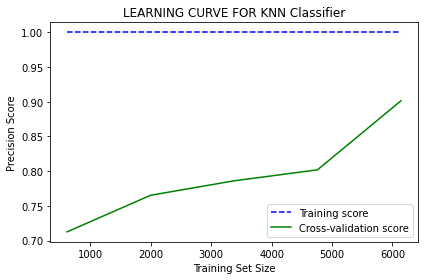

In [142]:
sizes, training_scores, testing_scores = learning_curve(KNeighborsClassifier(
n_neighbors=9,
    metric='manhattan', weights= 'distance'),scaled_x_train, y_train_res,
                                                       scoring="precision")

# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR KNN Classifier") 
plt.xlabel("Training Set Size"), plt.ylabel("Precision Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

# XGBOOST

In [128]:
import xgboost as xgb


In [129]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 6, 7, 8],
        }

xgb_clf = xgb.XGBClassifier(learning_rate=0.3, n_estimators=600, objective='binary:logistic',
                            nthread=1, use_label_encoder=False, eval_metric='logloss')

In [130]:


folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state = 25)

search = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(x_train, y_train), random_state=25)

search.fit(scaled_x_train, y_train_res)

print('Best hyperparameters:')
print(search.best_params_)

Best hyperparameters:
{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 8, 'gamma': 2, 'colsample_bytree': 0.8}


In [131]:
# joblib.dump(xgb_clf, 'xgb_gridsearch_smote3.pkl')

['xgb_gridsearch_smote3.pkl']

In [132]:
# xgbModel = joblib.load('xgb_gridsearch_smote3.pkl')
xgbModel=xgb_clf

In [143]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
t0=time.time()


# y_svc_predict = model_svc.predict(x_test)


params = {
        'min_child_weight': 1,
        'gamma': 2,
        'subsample': 1, #prevents overfitting
        'colsample_bytree': 0.8,
        'max_depth': 8,
        }

xgb_clf = xgb.XGBClassifier(learning_rate=0.3, n_estimators=600, objective='binary:logistic',
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"])

xgb_clf.fit(scaled_x_train, y_train_res,eval_set = [(scaled_x_train, y_train_res), (scaled_x_test, y_test)])
# print('Best hyperparameters:')
# print(search.best_params_)
print("training time.time:", round(time.time()-t0, 3)) # the time.time would be round to 3 decimal in seconds
t1=time.time()

[0]	validation_0-error:0.05928	validation_0-logloss:0.48816	validation_1-error:0.07157	validation_1-logloss:0.49309
[1]	validation_0-error:0.04821	validation_0-logloss:0.36789	validation_1-error:0.06861	validation_1-logloss:0.37890
[2]	validation_0-error:0.04573	validation_0-logloss:0.28954	validation_1-error:0.06219	validation_1-logloss:0.30682
[3]	validation_0-error:0.03844	validation_0-logloss:0.23262	validation_1-error:0.05923	validation_1-logloss:0.25436
[4]	validation_0-error:0.03674	validation_0-logloss:0.19366	validation_1-error:0.05429	validation_1-logloss:0.21862
[5]	validation_0-error:0.03336	validation_0-logloss:0.16356	validation_1-error:0.05577	validation_1-logloss:0.19262
[6]	validation_0-error:0.03010	validation_0-logloss:0.14230	validation_1-error:0.05281	validation_1-logloss:0.17583
[7]	validation_0-error:0.02671	validation_0-logloss:0.12465	validation_1-error:0.05281	validation_1-logloss:0.16231
[8]	validation_0-error:0.02489	validation_0-logloss:0.11152	validation_1

[71]	validation_0-error:0.00013	validation_0-logloss:0.01003	validation_1-error:0.04047	validation_1-logloss:0.10859
[72]	validation_0-error:0.00013	validation_0-logloss:0.00980	validation_1-error:0.03850	validation_1-logloss:0.10832
[73]	validation_0-error:0.00013	validation_0-logloss:0.00963	validation_1-error:0.03801	validation_1-logloss:0.10848
[74]	validation_0-error:0.00013	validation_0-logloss:0.00952	validation_1-error:0.03899	validation_1-logloss:0.10877
[75]	validation_0-error:0.00013	validation_0-logloss:0.00936	validation_1-error:0.03850	validation_1-logloss:0.10897
[76]	validation_0-error:0.00000	validation_0-logloss:0.00906	validation_1-error:0.03998	validation_1-logloss:0.10931
[77]	validation_0-error:0.00000	validation_0-logloss:0.00893	validation_1-error:0.03949	validation_1-logloss:0.10926
[78]	validation_0-error:0.00000	validation_0-logloss:0.00884	validation_1-error:0.03850	validation_1-logloss:0.10952
[79]	validation_0-error:0.00000	validation_0-logloss:0.00867	val

[141]	validation_0-error:0.00000	validation_0-logloss:0.00378	validation_1-error:0.03949	validation_1-logloss:0.12072
[142]	validation_0-error:0.00000	validation_0-logloss:0.00376	validation_1-error:0.03949	validation_1-logloss:0.12114
[143]	validation_0-error:0.00000	validation_0-logloss:0.00372	validation_1-error:0.03949	validation_1-logloss:0.12126
[144]	validation_0-error:0.00000	validation_0-logloss:0.00368	validation_1-error:0.03998	validation_1-logloss:0.12145
[145]	validation_0-error:0.00000	validation_0-logloss:0.00365	validation_1-error:0.04097	validation_1-logloss:0.12182
[146]	validation_0-error:0.00000	validation_0-logloss:0.00362	validation_1-error:0.04047	validation_1-logloss:0.12204
[147]	validation_0-error:0.00000	validation_0-logloss:0.00360	validation_1-error:0.03998	validation_1-logloss:0.12198
[148]	validation_0-error:0.00000	validation_0-logloss:0.00357	validation_1-error:0.04047	validation_1-logloss:0.12232
[149]	validation_0-error:0.00000	validation_0-logloss:0.

[211]	validation_0-error:0.00000	validation_0-logloss:0.00235	validation_1-error:0.04097	validation_1-logloss:0.13392
[212]	validation_0-error:0.00000	validation_0-logloss:0.00233	validation_1-error:0.04097	validation_1-logloss:0.13404
[213]	validation_0-error:0.00000	validation_0-logloss:0.00232	validation_1-error:0.04047	validation_1-logloss:0.13395
[214]	validation_0-error:0.00000	validation_0-logloss:0.00231	validation_1-error:0.04097	validation_1-logloss:0.13403
[215]	validation_0-error:0.00000	validation_0-logloss:0.00229	validation_1-error:0.04097	validation_1-logloss:0.13426
[216]	validation_0-error:0.00000	validation_0-logloss:0.00228	validation_1-error:0.04097	validation_1-logloss:0.13436
[217]	validation_0-error:0.00000	validation_0-logloss:0.00227	validation_1-error:0.04097	validation_1-logloss:0.13451
[218]	validation_0-error:0.00000	validation_0-logloss:0.00226	validation_1-error:0.04097	validation_1-logloss:0.13426
[219]	validation_0-error:0.00000	validation_0-logloss:0.

[281]	validation_0-error:0.00000	validation_0-logloss:0.00178	validation_1-error:0.04097	validation_1-logloss:0.14000
[282]	validation_0-error:0.00000	validation_0-logloss:0.00178	validation_1-error:0.04097	validation_1-logloss:0.13990
[283]	validation_0-error:0.00000	validation_0-logloss:0.00177	validation_1-error:0.04097	validation_1-logloss:0.14011
[284]	validation_0-error:0.00000	validation_0-logloss:0.00177	validation_1-error:0.04097	validation_1-logloss:0.13987
[285]	validation_0-error:0.00000	validation_0-logloss:0.00176	validation_1-error:0.04097	validation_1-logloss:0.13986
[286]	validation_0-error:0.00000	validation_0-logloss:0.00176	validation_1-error:0.04097	validation_1-logloss:0.14002
[287]	validation_0-error:0.00000	validation_0-logloss:0.00175	validation_1-error:0.04097	validation_1-logloss:0.14011
[288]	validation_0-error:0.00000	validation_0-logloss:0.00175	validation_1-error:0.04097	validation_1-logloss:0.14017
[289]	validation_0-error:0.00000	validation_0-logloss:0.

[351]	validation_0-error:0.00000	validation_0-logloss:0.00148	validation_1-error:0.04047	validation_1-logloss:0.14539
[352]	validation_0-error:0.00000	validation_0-logloss:0.00148	validation_1-error:0.04047	validation_1-logloss:0.14558
[353]	validation_0-error:0.00000	validation_0-logloss:0.00147	validation_1-error:0.04047	validation_1-logloss:0.14566
[354]	validation_0-error:0.00000	validation_0-logloss:0.00147	validation_1-error:0.04097	validation_1-logloss:0.14565
[355]	validation_0-error:0.00000	validation_0-logloss:0.00147	validation_1-error:0.04097	validation_1-logloss:0.14589
[356]	validation_0-error:0.00000	validation_0-logloss:0.00147	validation_1-error:0.04097	validation_1-logloss:0.14585
[357]	validation_0-error:0.00000	validation_0-logloss:0.00146	validation_1-error:0.04097	validation_1-logloss:0.14581
[358]	validation_0-error:0.00000	validation_0-logloss:0.00146	validation_1-error:0.04097	validation_1-logloss:0.14586
[359]	validation_0-error:0.00000	validation_0-logloss:0.

[421]	validation_0-error:0.00000	validation_0-logloss:0.00130	validation_1-error:0.04097	validation_1-logloss:0.14812
[422]	validation_0-error:0.00000	validation_0-logloss:0.00130	validation_1-error:0.04097	validation_1-logloss:0.14824
[423]	validation_0-error:0.00000	validation_0-logloss:0.00130	validation_1-error:0.04097	validation_1-logloss:0.14815
[424]	validation_0-error:0.00000	validation_0-logloss:0.00130	validation_1-error:0.04097	validation_1-logloss:0.14813
[425]	validation_0-error:0.00000	validation_0-logloss:0.00129	validation_1-error:0.04097	validation_1-logloss:0.14834
[426]	validation_0-error:0.00000	validation_0-logloss:0.00129	validation_1-error:0.04097	validation_1-logloss:0.14841
[427]	validation_0-error:0.00000	validation_0-logloss:0.00129	validation_1-error:0.04097	validation_1-logloss:0.14847
[428]	validation_0-error:0.00000	validation_0-logloss:0.00129	validation_1-error:0.04097	validation_1-logloss:0.14854
[429]	validation_0-error:0.00000	validation_0-logloss:0.

[491]	validation_0-error:0.00000	validation_0-logloss:0.00118	validation_1-error:0.04097	validation_1-logloss:0.14973
[492]	validation_0-error:0.00000	validation_0-logloss:0.00118	validation_1-error:0.04097	validation_1-logloss:0.14980
[493]	validation_0-error:0.00000	validation_0-logloss:0.00118	validation_1-error:0.04097	validation_1-logloss:0.14984
[494]	validation_0-error:0.00000	validation_0-logloss:0.00118	validation_1-error:0.04097	validation_1-logloss:0.14979
[495]	validation_0-error:0.00000	validation_0-logloss:0.00118	validation_1-error:0.04097	validation_1-logloss:0.14971
[496]	validation_0-error:0.00000	validation_0-logloss:0.00117	validation_1-error:0.04097	validation_1-logloss:0.14979
[497]	validation_0-error:0.00000	validation_0-logloss:0.00117	validation_1-error:0.04097	validation_1-logloss:0.14978
[498]	validation_0-error:0.00000	validation_0-logloss:0.00117	validation_1-error:0.04097	validation_1-logloss:0.14995
[499]	validation_0-error:0.00000	validation_0-logloss:0.

[561]	validation_0-error:0.00000	validation_0-logloss:0.00110	validation_1-error:0.04047	validation_1-logloss:0.15147
[562]	validation_0-error:0.00000	validation_0-logloss:0.00110	validation_1-error:0.04047	validation_1-logloss:0.15151
[563]	validation_0-error:0.00000	validation_0-logloss:0.00110	validation_1-error:0.04047	validation_1-logloss:0.15147
[564]	validation_0-error:0.00000	validation_0-logloss:0.00110	validation_1-error:0.04047	validation_1-logloss:0.15146
[565]	validation_0-error:0.00000	validation_0-logloss:0.00110	validation_1-error:0.04047	validation_1-logloss:0.15153
[566]	validation_0-error:0.00000	validation_0-logloss:0.00110	validation_1-error:0.04047	validation_1-logloss:0.15147
[567]	validation_0-error:0.00000	validation_0-logloss:0.00110	validation_1-error:0.03998	validation_1-logloss:0.15155
[568]	validation_0-error:0.00000	validation_0-logloss:0.00110	validation_1-error:0.04047	validation_1-logloss:0.15167
[569]	validation_0-error:0.00000	validation_0-logloss:0.

In [144]:
xgb_predictions = xgb_clf.predict(scaled_x_test)
print( "predict time.time:", round(time.time()-t1, 3), "s")
xgb_predictions = np.round(xgb_predictions)
print('XGBoost Test Set')
print('Accuracy: %.2f' % ((xgb_predictions == y_test).mean()*100))

predict time.time: 75.795 s
XGBoost Test Set
Accuracy: 95.95


In [145]:
getMetrics(xgb_clf,scaled_x_train,y_train_res,scaled_x_valid,y_valid)

Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       339
           1       0.98      0.98      0.98      1687

    accuracy                           0.97      2026
   macro avg       0.95      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026

Training Accuracy_Score: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Validation Accuracy_Score: 97.23593287265548 %
Validation Precision: 98.28300769686204 %
Validation Recall: 98.3995257854179 %
Validation F1 Score: 98.34123222748815 %


In [146]:
results = xgb_clf.evals_result()
# print(results)


In [148]:
from matplotlib import pyplot

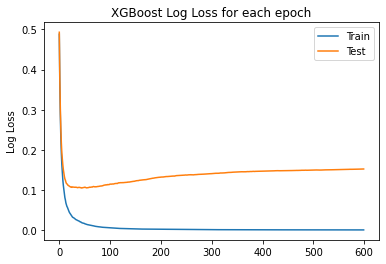

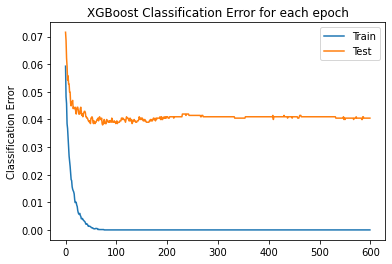

In [154]:
#https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss for each epoch')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error for each epoch')
pyplot.show()

In [150]:
roc_auc_score(y_test, xgb_predictions)

0.9209101629502573

In [155]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import StratifiedKFold

params = {
        'min_child_weight': 1,
        'gamma': 1,
        'subsample': 0.6, #prevents overfitting
        'colsample_bytree': 0.8,
        'max_depth': 5,
        }

xgb_clf1 = xgb.XGBClassifier(learning_rate=0.15, n_estimators=600, objective='binary:logistic',
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"])

xgb_clf1.fit(scaled_x_train, y_train_res,eval_set = [(scaled_x_train, y_train_res), (scaled_x_test, y_test)],early_stopping_rounds=100,)
# print('Best hyperparameters:')
# print(search.best_params_)

[0]	validation_0-error:0.05928	validation_0-logloss:0.58195	validation_1-error:0.07157	validation_1-logloss:0.58437
[1]	validation_0-error:0.05707	validation_0-logloss:0.49809	validation_1-error:0.06614	validation_1-logloss:0.50231
[2]	validation_0-error:0.05108	validation_0-logloss:0.43163	validation_1-error:0.06614	validation_1-logloss:0.43937
[3]	validation_0-error:0.04912	validation_0-logloss:0.37882	validation_1-error:0.06713	validation_1-logloss:0.38988
[4]	validation_0-error:0.04625	validation_0-logloss:0.33470	validation_1-error:0.06318	validation_1-logloss:0.34784
[5]	validation_0-error:0.04326	validation_0-logloss:0.29712	validation_1-error:0.06170	validation_1-logloss:0.31316
[6]	validation_0-error:0.04117	validation_0-logloss:0.26644	validation_1-error:0.05972	validation_1-logloss:0.28549
[7]	validation_0-error:0.03844	validation_0-logloss:0.24000	validation_1-error:0.05775	validation_1-logloss:0.26187
[8]	validation_0-error:0.03661	validation_0-logloss:0.21713	validation_1

[71]	validation_0-error:0.00326	validation_0-logloss:0.02719	validation_1-error:0.04442	validation_1-logloss:0.10449
[72]	validation_0-error:0.00313	validation_0-logloss:0.02676	validation_1-error:0.04393	validation_1-logloss:0.10467
[73]	validation_0-error:0.00313	validation_0-logloss:0.02619	validation_1-error:0.04393	validation_1-logloss:0.10508
[74]	validation_0-error:0.00300	validation_0-logloss:0.02593	validation_1-error:0.04393	validation_1-logloss:0.10516
[75]	validation_0-error:0.00300	validation_0-logloss:0.02544	validation_1-error:0.04393	validation_1-logloss:0.10551
[76]	validation_0-error:0.00274	validation_0-logloss:0.02472	validation_1-error:0.04344	validation_1-logloss:0.10589
[77]	validation_0-error:0.00274	validation_0-logloss:0.02456	validation_1-error:0.04344	validation_1-logloss:0.10561
[78]	validation_0-error:0.00274	validation_0-logloss:0.02407	validation_1-error:0.04393	validation_1-logloss:0.10540
[79]	validation_0-error:0.00274	validation_0-logloss:0.02388	val

[141]	validation_0-error:0.00026	validation_0-logloss:0.01130	validation_1-error:0.04146	validation_1-logloss:0.10857
[142]	validation_0-error:0.00026	validation_0-logloss:0.01121	validation_1-error:0.04146	validation_1-logloss:0.10877
[143]	validation_0-error:0.00026	validation_0-logloss:0.01106	validation_1-error:0.04146	validation_1-logloss:0.10869
[144]	validation_0-error:0.00026	validation_0-logloss:0.01089	validation_1-error:0.04097	validation_1-logloss:0.10870
[145]	validation_0-error:0.00026	validation_0-logloss:0.01077	validation_1-error:0.04097	validation_1-logloss:0.10853
[146]	validation_0-error:0.00013	validation_0-logloss:0.01063	validation_1-error:0.04097	validation_1-logloss:0.10878
[147]	validation_0-error:0.00013	validation_0-logloss:0.01054	validation_1-error:0.04097	validation_1-logloss:0.10879
[148]	validation_0-error:0.00013	validation_0-logloss:0.01044	validation_1-error:0.04097	validation_1-logloss:0.10857
[149]	validation_0-error:0.00013	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              eval_metric=['error', 'logloss'], gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [156]:
    results1 = xgb_clf1.evals_result()
    epochs1 = len(results1["validation_0"]["error"])
    x_axis1 = range(0, epochs1)

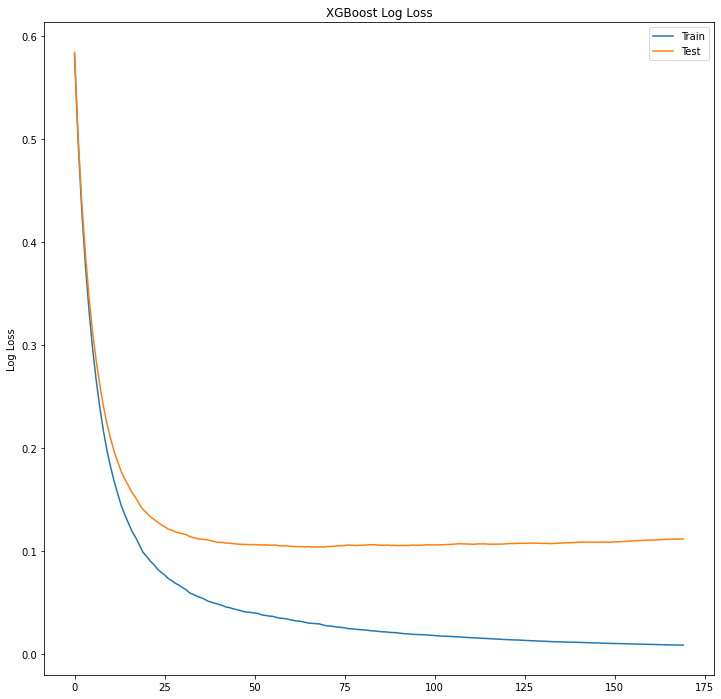

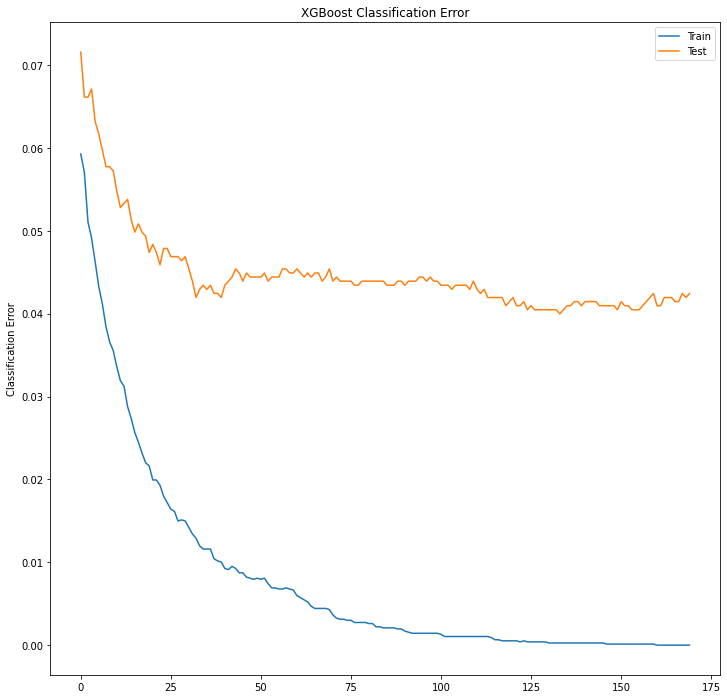

In [157]:
 # plot log loss
    fig, ax = pyplot.subplots(figsize=(12,12))
    ax.plot(x_axis1, results1["validation_0"]["logloss"], label="Train")
    ax.plot(x_axis1, results1["validation_1"]["logloss"], label="Test")
    ax.legend()
    pyplot.ylabel("Log Loss")
    pyplot.title("XGBoost Log Loss")
    pyplot.show()

    # plot classification error
    fig, ax = pyplot.subplots(figsize=(12,12))
    ax.plot(x_axis1, results1["validation_0"]["error"], label="Train")
    ax.plot(x_axis1, results1["validation_1"]["error"], label="Test")
    ax.legend()
    pyplot.ylabel("Classification Error")
    pyplot.title("XGBoost Classification Error")
    pyplot.show()

In [158]:
getMetrics(xgb_clf1,scaled_x_train,y_train_res,scaled_x_valid,y_valid)

Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       339
           1       0.98      0.98      0.98      1687

    accuracy                           0.97      2026
   macro avg       0.95      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026

Training Accuracy_Score: 99.57003257328991 %
Training Precision: 99.687255668491 %
Training Recall: 99.66777408637874 %
Training F1 Score: 99.67751392553504 %
Validation Accuracy_Score: 97.08785784797631 %
Validation Precision: 98.33729216152018 %
Validation Recall: 98.1624184943687 %
Validation F1 Score: 98.24977751409078 %


In [159]:
getMetrics(xgb_clf1,scaled_x_train,y_train_res,scaled_x_test,y_test)

Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       330
           1       0.97      0.98      0.97      1696

    accuracy                           0.95      2026
   macro avg       0.92      0.91      0.92      2026
weighted avg       0.95      0.95      0.95      2026

Training Accuracy_Score: 99.57003257328991 %
Training Precision: 99.687255668491 %
Training Recall: 99.66777408637874 %
Training F1 Score: 99.67751392553504 %
Validation Accuracy_Score: 95.45903257650544 %
Validation Precision: 97.010550996483 %
Validation Recall: 97.58254716981132 %
Validation F1 Score: 97.29570840681953 %
